### **Import Libraries**

In [3]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

### **Part1: Activation functions and their derivatives**

In [4]:
#part1: Activation functions and their derivatives

def sigmoid(X):
  """The sigmoid activation funtion."""
  return 1/(1+np.exp(-X))

def sigmoid_prime(X):
  """Derivative of the sigmoid function."""
  return sigmoid(X) * (1- sigmoid(X))

def tanh(X):
  """The hyperbolic tangent activation function."""
  return np.tanh(X)

def tanh_prime(X):
  """Derivative of the tanh function."""
  return 1-np.tanh(X)**2

### **Part 2: The NeuralNetwork Class**

In [5]:
# NeuralNetwork class
class NeuralNetwork:
    def __init__(self, layers, activation='sigmoid'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        self.layers = layers
        self.num_layers = len(layers)
        self.weights = [
            2 * np.random.random((layers[i - 1] + 1, layers[i] + (0 if i == len(layers)-1 else 1))) - 1
            for i in range(1, len(layers))]

    def fit(self, X, y, learning_rate=0.2, steps=100000, tol=1e-2):
        rms_errors = []
        biases = np.expand_dims(np.ones(X.shape[0]), axis=1)
        X = np.hstack((biases, X))

        for st in range(steps):
            i = np.random.randint(X.shape[0])
            act = [X[i]]

            # Forward pass
            for l in range(len(self.weights)):
                dot_value = np.dot(act[l], self.weights[l])
                activation = self.activation(dot_value)
                act.append(activation)

            # Backward pass
            error = y[i] - act[-1]
            deltas = [error * self.activation_prime(act[-1])]
            for l in range(len(act) - 2, 0, -1):
                deltas.append(deltas[-1] @ self.weights[l].T * self.activation_prime(act[l]))
            deltas.reverse()

            # Update weights
            for i in range(len(self.weights)):
                layer_input = act[i].reshape(-1, 1)
                delta = deltas[i].reshape(1, -1)
                self.weights[i] += learning_rate * layer_input @ delta

            # Calculate RMS error
            RMS_err = self.find_RMS_error(X, y)
            rms_errors.append(RMS_err)

            # Print progress
            if st % (steps // 10) == 0 or st == steps - 1:
                print(f"step: {st}\nRMS_err: {RMS_err}")

            # Check for convergence
            if RMS_err < tol:
                print("NN training succeeded!")
                return rms_errors

        print("NN training failed.")
        return rms_errors

    def find_RMS_error(self, X, y):
        predictions = np.array([self.predict(x[1:]) for x in X])
        errors = predictions - y
        RMS_error = np.sqrt(np.mean(np.square(errors)))
        return RMS_error

    def predict(self, x):
        a = np.concatenate((np.ones(1), np.array(x)))
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def visual_NN_boundaries(self, Nsamp=2000):
        X = np.random.rand(Nsamp, 2)
        y_pred = np.array([self.predict(x)[0] for x in X])
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
        plt.title("Neural Network Decision Boundary")
        plt.show()


### **Part 3: Training Neural Network on XOR**

In [6]:
# part 3 : Training Neural Network on XOR problem

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
nn = NeuralNetwork([2, 2, 1], activation='tanh')


### **Model Fit on Part 1**

In [7]:
error_history = nn.fit(X, y, learning_rate=0.05, steps=20000, tol=1e-2)

step: 0
RMS_err: 0.7946310374728925
step: 2000
RMS_err: 0.25301365996709607
step: 4000
RMS_err: 0.038260004121946745
step: 6000
RMS_err: 0.015463710255289474
NN training succeeded!


### **Part 4: Visualizing Learning Metric ( RMS Error vs. Training Steps)**

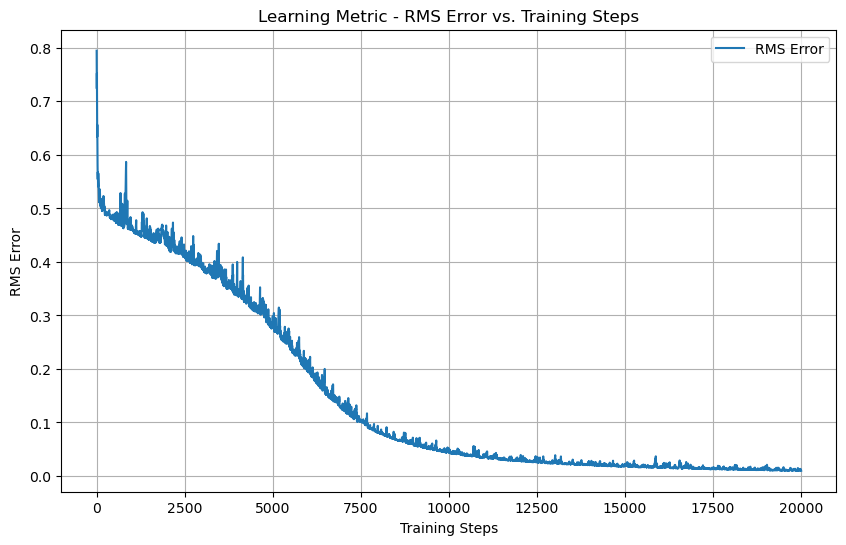

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 20000, len(error_history)), error_history, label='RMS Error')
plt.xlabel('Training Steps')
plt.ylabel('RMS Error')
plt.title('Learning Metric - RMS Error vs. Training Steps')
plt.legend()
plt.grid(True)
plt.show()


### **Visualize the Decision Boundries**

Decision Boundaries



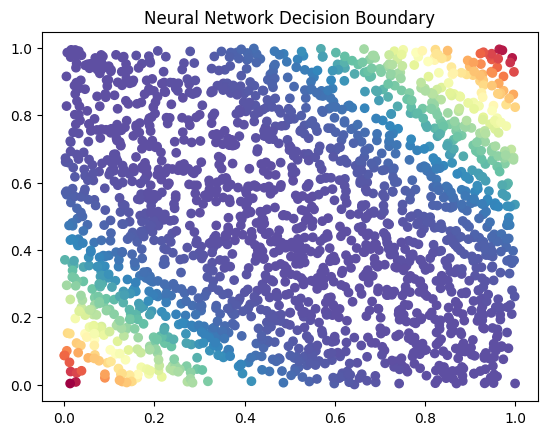

In [62]:
# Visualize decision boundaries
print("Decision Boundaries\n")
nn.visual_NN_boundaries()


### **Part2 : Training with a modified Dataset and Architecture**

In [11]:
# part 2: Training Neural Network on the new problem

X_part2 = np.array([[0, 0], [0, 1], [0.5, 1], [0, 0.5], [1, 0], [1, 1]])
y_part2 = np.array([[0], [0], [0], [1], [1], [1]])

nn_part2 = NeuralNetwork([2, 2, 2, 1], activation='tanh')  # Increase network complexity


### **Fit Model For Part2**

In [12]:

error_history_part2 = nn_part2.fit(X_part2, y_part2, learning_rate=0.1, steps=50000, tol=1e-3)


step: 0
RMS_err: 0.7187708908601677
step: 5000
RMS_err: 0.051922068769844246
step: 10000
RMS_err: 0.06283507027804226
step: 15000
RMS_err: 0.011363390567053216
step: 20000
RMS_err: 0.011475566880068414
step: 25000
RMS_err: 0.004472179841024492
step: 30000
RMS_err: 0.03945660627087702
step: 35000
RMS_err: 0.010314026944440719
NN training succeeded!


###**Visualize the decision boundries for Part 2**

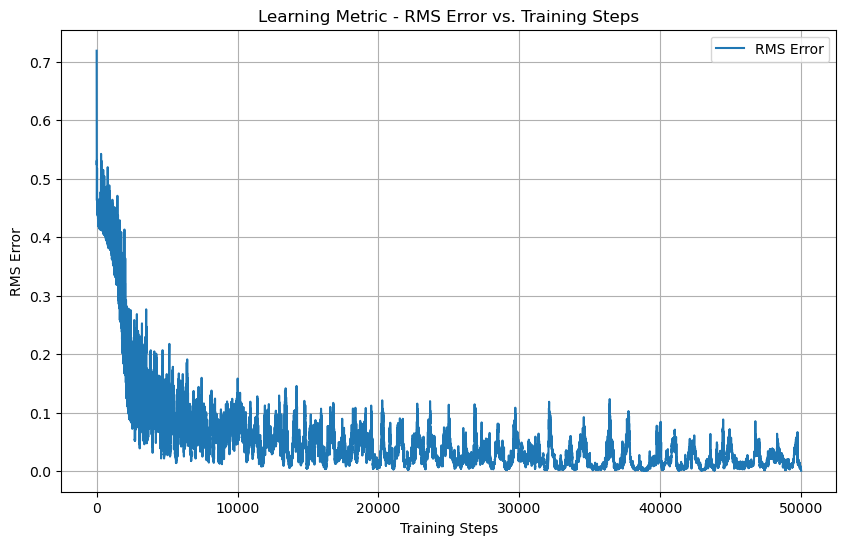

In [13]:

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 50000, len(error_history_part2)), error_history_part2, label='RMS Error')
plt.xlabel('Training Steps')
plt.ylabel('RMS Error')
plt.title('Learning Metric - RMS Error vs. Training Steps')
plt.legend()
plt.grid(True)
plt.show()


### **Visualize decision boundaries**

Decision Boundaries for Part 2



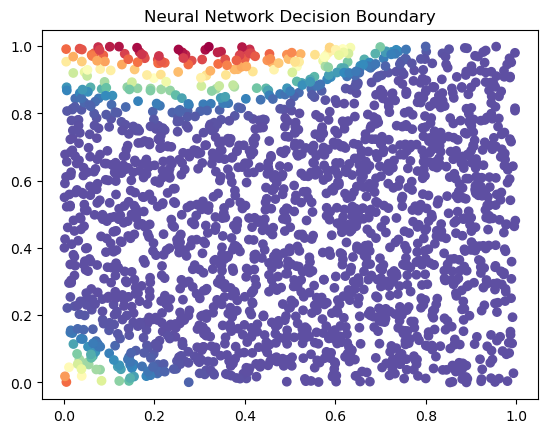

In [14]:
# Visualize decision boundaries for Part 2
print("Decision Boundaries for Part 2\n")
nn_part2.visual_NN_boundaries()